<a href="https://colab.research.google.com/github/danielturg/Road2_AI_Course_Scripts/blob/main/3DObject_to_Grayscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creating the functions for creating 3d shapes and converting them into grayscale images and vice-versa**

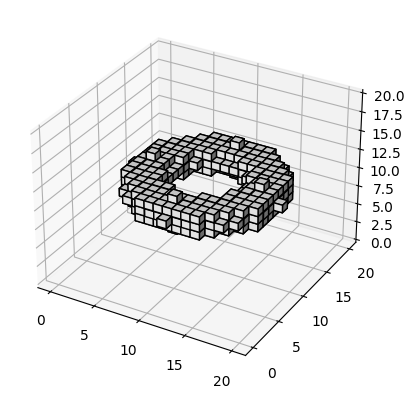

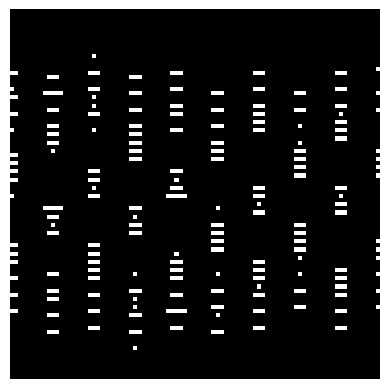

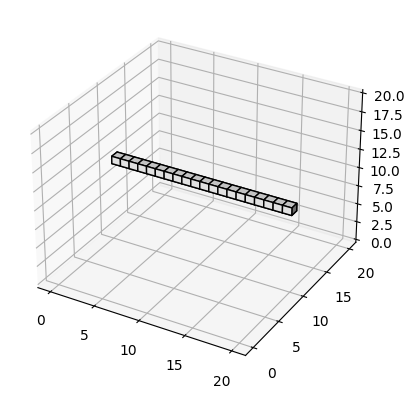

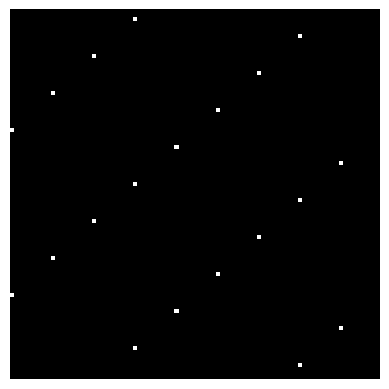

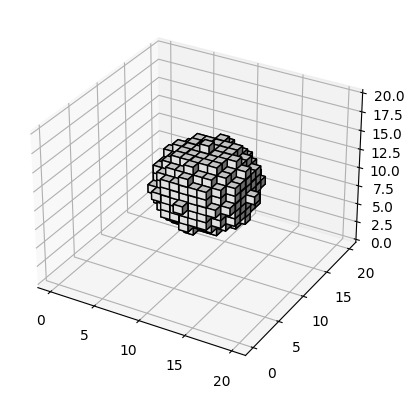

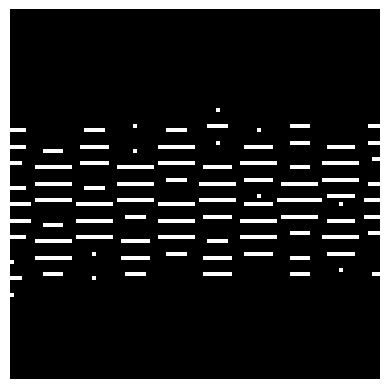

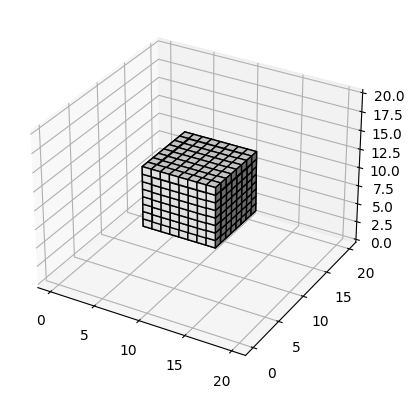

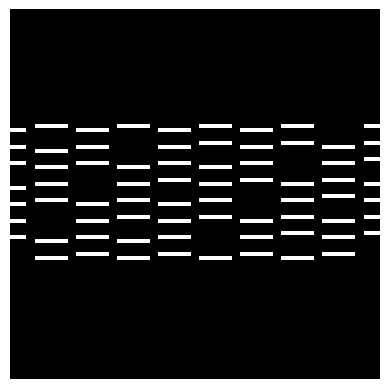

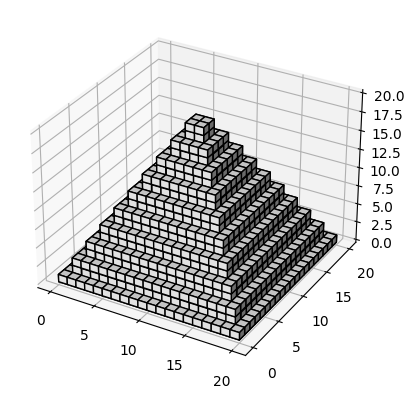

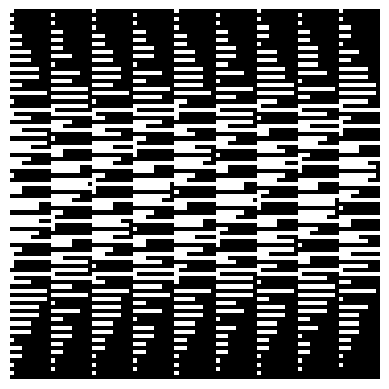

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_torus(width, height, depth, major_radius, minor_radius, center=None):
    if center is None:
        center = np.array([width // 2, height // 2, depth // 2])

    x, y, z = np.ogrid[:width, :height, :depth]

    # Parametric equations for a torus with specified center
    torus_mask = (
        (major_radius - np.sqrt((x - center[0])**2 + (y - center[1])**2))**2 +
        (z - center[2])**2 <= minor_radius**2
    )

    torus = np.zeros((width, height, depth))
    torus[torus_mask] = 1.0
    return torus

def create_sphere(width, height, depth, radius, center=None):
    if center is None:
        center = np.array([width // 2, height // 2, depth // 2])

    x, y, z = np.ogrid[:width, :height, :depth]

    # Parametric equations for a sphere with specified center
    sphere_mask = (x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2 <= radius**2

    sphere = np.zeros((width, height, depth))
    sphere[sphere_mask] = 1.0
    return sphere


def create_cube(width, height, depth, size, position=None):
    if position is None:
        position = np.array([width // 2, height // 2, depth // 2])

    x, y, z = np.ogrid[:width, :height, :depth]

    # Calculate the half-size of the cube
    half_size = size // 2

    # Define the cube mask based on its position and size
    cube_mask = (
        (x >= position[0] - half_size) & (x < position[0] + half_size) &
        (y >= position[1] - half_size) & (y < position[1] + half_size) &
        (z >= position[2] - half_size) & (z < position[2] + half_size)
    )

    cube = np.zeros((width, height, depth))
    cube[cube_mask] = 1.0
    return cube


def create_slab(width, height, depth, slab_width, position=None):
    if position is None:
        position = np.array([width // 2, height // 2, depth // 2])

    x, y, z = np.ogrid[:width, :height, :depth]

    # Calculate the half-width of the slab
    half_width = slab_width // 2

    # Define the slab mask based on its position and width
    slab_mask = (
        (x >= position[0] - half_width) & (x < position[0] + half_width) &
        (z >= position[1] - 0.5) & (z < position[1] + 0.5) &
        (y >= position[2] - half_width) & (y < position[2] + half_width)
    )

    slab = np.zeros((width, height, depth))
    slab[slab_mask] = 1.0
    return slab

def create_pyramid(width, height, depth, base_width, base_position):
    pyramid = np.zeros((width, height, depth))
    slab_width = base_width
    slab_position = base_position
    for i in range(base_width,0,-1):
      slab_tensor = create_slab(width, height, depth, slab_width, slab_position)
      slab_position[1]+=1
      slab_width-=1
      pyramid+=slab_tensor

    return pyramid

def create_stick(xcor, zcor):
    stick = np.zeros((20, 20, 20))
    stick[:, xcor, zcor] = 1.0
    return stick

def display_image(resulting_image):
    plt.imshow(resulting_image, cmap='gray')
    plt.axis('off')
    plt.show()

def display_3d(tensor):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(tensor, facecolors='white', edgecolors='k')
    plt.show()

def tensor_to_grayscale_image(tensor_3d):
    tensor_3d = tensor_3d.reshape((8000))
    tensor_with_zeroes = np.concatenate((tensor_3d, np.zeros((100))), axis=0) #so you can take the square root
    combined_image = tensor_with_zeroes.reshape((90,90))
    return combined_image

def image_to_tensor(image):
    tensor = image.reshape((8100))[:-100].reshape((20,20,20))
    return tensor



# Test with a torus-shaped 3D object  ######TORUS
width, height, depth = 20, 20, 20
major_radius, minor_radius = 6, 2
torus_center = np.array([10, 10, 10])  # Specify the center coordinates
torus_tensor = create_torus(width, height, depth, major_radius, minor_radius, torus_center)

# Display 3D object
display_3d(torus_tensor)

# Convert to grayscale format and display
torus_grayscale = tensor_to_grayscale_image(torus_tensor)
display_image(torus_grayscale)



# Test with a stick-shaped 3D object  ######STICK
stick_x= 10
stick_z = 10
stick_tensor = create_stick(stick_x,stick_z)

# Display 3D object
display_3d(stick_tensor)

# Convert to grayscale format and display
stick_grayscale = tensor_to_grayscale_image(stick_tensor)
display_image(stick_grayscale)



# Test with a sphere-shaped 3D object with a custom center  ######SPHERE
sphere_radius = 5
sphere_center = np.array([10, 10, 10])
sphere_tensor = create_sphere(width, height, depth, sphere_radius, sphere_center)

# Display 3D object
display_3d(sphere_tensor)

# Convert to grayscale format and display
sphere_grayscale = tensor_to_grayscale_image(sphere_tensor)
display_image(sphere_grayscale)



# Test with a cube-shaped 3D object with a custom size and location  ######CUBE
cube_size = 8
cube_position = np.array([10, 10, 10])
cube_tensor = create_cube(width, height, depth, cube_size, cube_position)

# Display 3D object
display_3d(cube_tensor)

# Convert to grayscale format and display
cube_grayscale = tensor_to_grayscale_image(cube_tensor)
display_image(cube_grayscale)



# Test with a pyramid-shaped 3D object  ######PYRAMID
base_width = 20
base_position = np.array([10, 0, 10])
pyramid_tensor = create_pyramid(width, height, depth,base_width, base_position)

# Display 3D object
display_3d(pyramid_tensor)

# Convert to grayscale format and display
pyramid_grayscale = tensor_to_grayscale_image(pyramid_tensor)
display_image(pyramid_grayscale)





**Creating the dataset:**

In [3]:
import os
import shutil
import random

def create_dataset(dataset_size, path):
    classes = ["sphere", "cube", "pyramid", "stick", "torus"]
    images_per_class = dataset_size // len(classes)

    for class_name in classes:
        class_path = os.path.join(path, class_name)
        os.makedirs(class_path, exist_ok=True)

        for i in range(images_per_class):
            width, height, depth = 20, 20, 20

            if class_name == "torus":
                major_radius = random.randint(5, 10)
                minor_radius = random.randint(2, major_radius - 1)
                torus_tensor = create_torus(width, height, depth, major_radius, minor_radius)
                save_image(torus_tensor, class_path, f"torus_{i}.png")

            elif class_name == "stick":
                stick_x = random.randint(0, width - 1)
                stick_z = random.randint(0, depth - 1)
                stick_tensor = create_stick(stick_x, stick_z)
                save_image(stick_tensor, class_path, f"stick_{i}.png")

            elif class_name == "sphere":
                sphere_radius = random.randint(5, 10)
                sphere_center = np.array([random.randint(0, width - 1), random.randint(0, height - 1), random.randint(0, depth - 1)])
                sphere_tensor = create_sphere(width, height, depth, sphere_radius, sphere_center)
                save_image(sphere_tensor, class_path, f"sphere_{i}.png")

            elif class_name == "cube":
                cube_size = random.randint(5, 10)
                cube_position = np.array([random.randint(cube_size // 2, width - cube_size // 2 - 1),
                                          random.randint(cube_size // 2, height - cube_size // 2 - 1),
                                          random.randint(cube_size // 2, depth - cube_size // 2 - 1)])
                cube_tensor = create_cube(width, height, depth, cube_size, cube_position)
                save_image(cube_tensor, class_path, f"cube_{i}.png")

            elif class_name == "pyramid":
                base_width = random.randint(5, 15)
                base_position = np.array([random.randint(0, width - base_width - 1),
                                          random.randint(0, height - 1),
                                          random.randint(0, depth - base_width - 1)])
                pyramid_tensor = create_pyramid(width, height, depth, base_width, base_position)
                save_image(pyramid_tensor, class_path, f"pyramid_{i}.png")

def save_image(tensor, folder_path, file_name):
    image_path = os.path.join(folder_path, file_name)
    grayscale_image = tensor_to_grayscale_image(tensor)
    plt.imsave(image_path, grayscale_image, cmap='gray', format='png')

# Example usage:
dataset_size = 1000
output_path = "/content/drive/MyDrive/AI_Course/FinalProject/test_dataset_sized_1000"
create_dataset(dataset_size, output_path)


**A function for displaying an image from the dataset:**

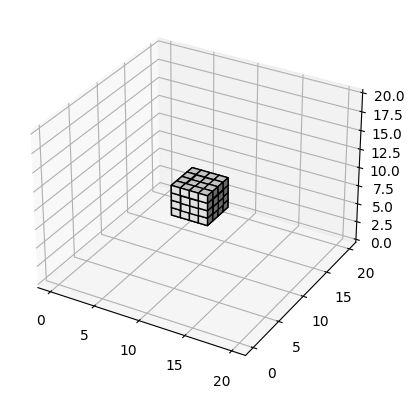

In [29]:
def display_image_from_path(image_path):
    # Load the image
    image = plt.imread(image_path)
    image = image[:, :, 0]
    # Convert the image to a 3D tensor
    tensor = image_to_tensor(image)

    # Display the 3D object
    display_3d(tensor)

# Example usage:
image_path_to_display = "/content/drive/MyDrive/AI_Course/FinalProject/dataset_sized_1000/cube/cube_102.png"
display_image_from_path(image_path_to_display)

**Building and training a classification CNN model on the dataset:**

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

# Define constants
image_size = (90, 90)
batch_size = 32
epochs = 10
num_classes = 5

# Define paths
train_data_dir = "/content/drive/MyDrive/AI_Course/FinalProject/dataset_sized_5000"
validation_data_dir = "/content/drive/MyDrive/AI_Course/FinalProject/validation_dataset_sized_1000"
test_data_dir = "/content/drive/MyDrive/AI_Course/FinalProject/test_dataset_sized_1000"

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False  # To maintain the order of predictions for evaluation
)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Evaluate the model on the test set
test_generator.reset()
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate and print the accuracy on the test set
test_accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 5000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Epoch 1/10
157/157 [==============================] - 969s 6s/step - loss: 0.4124 - accuracy: 0.8460 - val_loss: 0.0828 - val_accuracy: 0.9750
Epoch 2/10
157/157 [==============================] - 10s 63ms/step - loss: 0.0719 - accuracy: 0.9750 - val_loss: 0.0156 - val_accuracy: 0.9980
Epoch 3/10
157/157 [==============================] - 10s 67ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4/10
157/157 [==============================] - 11s 71ms/step - loss: 0.0166 - accuracy: 0.9964 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 5/10
157/157 [==============================] - 11s 68ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0104 - val_accuracy: 0.9950
Epoch 6/10
157/157 [==============================] - 11s 72ms/step - loss: 0.0111 - accuracy: 0.9972 - val_loss: 0.0024 - val_accuracy: 0.9990
Epoch 7/10


**Predicting an example image:**

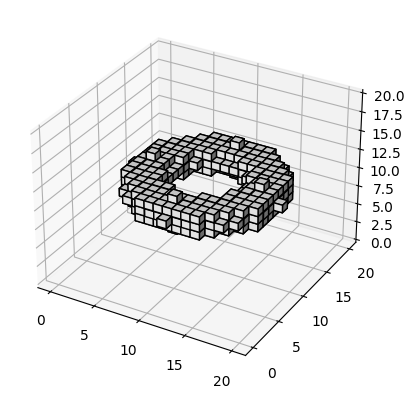

1/1 [==============================] - 0s 17ms/step
The predicted class is: torus


In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np

def save_image(tensor, folder_path, file_name):
    image_path = os.path.join(folder_path, file_name)
    grayscale_image = tensor_to_grayscale_image(tensor)
    plt.imsave(image_path, grayscale_image, cmap='gray', format='png')

# Test with a torus-shaped 3D object  ######TORUS
width, height, depth = 20, 20, 20
major_radius, minor_radius = 6, 2
torus_center = np.array([10, 10, 10])  # Specify the center coordinates
torus_tensor = create_torus(width, height, depth, major_radius, minor_radius, torus_center)

# Display 3D object
display_3d(torus_tensor)

# Convert to grayscale format
torus_grayscale = tensor_to_grayscale_image(torus_tensor)


#save it:
save_image(torus_tensor, "/content/drive/MyDrive/AI_Course/FinalProject", "test_torus_image")


#predicting:

# Load and preprocess the input image
image_path = "/content/drive/MyDrive/AI_Course/FinalProject/test_torus_image"  # Replace with the path to your image
img = image.load_img(image_path, target_size=image_size, color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values to be between 0 and 1

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class label
predicted_class_index = np.argmax(predictions[0])
class_labels = {0: 'cube', 1: 'pyramid', 2: 'sphere', 3: 'stick', 4: 'torus'}
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print(f"The predicted class is: {predicted_class_label}")


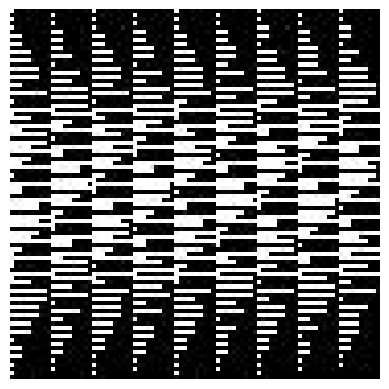

1/1 [==============================] - 0s 24ms/step
The predicted class is: torus


In [17]:
#predicting and displaying only:
# Load and preprocess the input image
image_path = "/content/drive/MyDrive/AI_Course/FinalProject/test_pyramid_image"  # Replace with the path to your image
img = image.load_img(image_path, target_size=image_size, color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values to be between 0 and 1
display_image(img)
# Make predictions
predictions = model.predict(img_array)

# Get the predicted class label
predicted_class_index = np.argmax(predictions[0])
class_labels = {0: 'cube', 1: 'pyramid', 2: 'sphere', 3: 'stick', 4: 'torus'}
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print(f"The predicted class is: {predicted_class_label}")

In [19]:
# Assuming 'model' is the variable containing your trained model
model.save("/content/drive/MyDrive/AI_Course/FinalProject/trained_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Using the trained model for prediction- you can run this cell alone:**

1/1 [==============================] - 1s 933ms/step


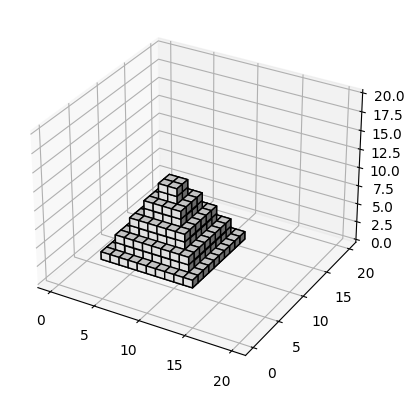

The predicted class is: pyramid


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.preprocessing import image

#Functions:

def display_image_from_path(image_path):
    # Load the image
    image = plt.imread(image_path)
    image = image[:, :, 0]
    # Convert the image to a 3D tensor
    tensor = image_to_tensor(image)

    # Display the 3D object
    display_3d(tensor)

def save_image(tensor, folder_path, file_name):
    image_path = os.path.join(folder_path, file_name)
    grayscale_image = tensor_to_grayscale_image(tensor)
    plt.imsave(image_path, grayscale_image, cmap='gray', format='png')

def create_torus(width, height, depth, major_radius, minor_radius, center=None):
    if center is None:
        center = np.array([width // 2, height // 2, depth // 2])

    x, y, z = np.ogrid[:width, :height, :depth]

    # Parametric equations for a torus with specified center
    torus_mask = (
        (major_radius - np.sqrt((x - center[0])**2 + (y - center[1])**2))**2 +
        (z - center[2])**2 <= minor_radius**2
    )

    torus = np.zeros((width, height, depth))
    torus[torus_mask] = 1.0
    return torus

def create_sphere(width, height, depth, radius, center=None):
    if center is None:
        center = np.array([width // 2, height // 2, depth // 2])

    x, y, z = np.ogrid[:width, :height, :depth]

    # Parametric equations for a sphere with specified center
    sphere_mask = (x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2 <= radius**2

    sphere = np.zeros((width, height, depth))
    sphere[sphere_mask] = 1.0
    return sphere


def create_cube(width, height, depth, size, position=None):
    if position is None:
        position = np.array([width // 2, height // 2, depth // 2])

    x, y, z = np.ogrid[:width, :height, :depth]

    # Calculate the half-size of the cube
    half_size = size // 2

    # Define the cube mask based on its position and size
    cube_mask = (
        (x >= position[0] - half_size) & (x < position[0] + half_size) &
        (y >= position[1] - half_size) & (y < position[1] + half_size) &
        (z >= position[2] - half_size) & (z < position[2] + half_size)
    )

    cube = np.zeros((width, height, depth))
    cube[cube_mask] = 1.0
    return cube


def create_slab(width, height, depth, slab_width, position=None):
    if position is None:
        position = np.array([width // 2, height // 2, depth // 2])

    x, y, z = np.ogrid[:width, :height, :depth]

    # Calculate the half-width of the slab
    half_width = slab_width // 2

    # Define the slab mask based on its position and width
    slab_mask = (
        (x >= position[0] - half_width) & (x < position[0] + half_width) &
        (z >= position[1] - 0.5) & (z < position[1] + 0.5) &
        (y >= position[2] - half_width) & (y < position[2] + half_width)
    )

    slab = np.zeros((width, height, depth))
    slab[slab_mask] = 1.0
    return slab

def create_pyramid(width, height, depth, base_width, base_position):
    pyramid = np.zeros((width, height, depth))
    slab_width = base_width
    slab_position = base_position
    for i in range(base_width,0,-1):
      slab_tensor = create_slab(width, height, depth, slab_width, slab_position)
      slab_position[1]+=1
      slab_width-=1
      pyramid+=slab_tensor

    return pyramid

def create_stick(xcor, zcor):
    stick = np.zeros((20, 20, 20))
    stick[:, xcor, zcor] = 1.0
    return stick

def display_image(resulting_image):
    plt.imshow(resulting_image, cmap='gray')
    plt.axis('off')
    plt.show()

def display_3d(tensor):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(tensor, facecolors='white', edgecolors='k')
    plt.show()

def tensor_to_grayscale_image(tensor_3d):
    tensor_3d = tensor_3d.reshape((8000))
    tensor_with_zeroes = np.concatenate((tensor_3d, np.zeros((100))), axis=0) #so you can take the square root
    combined_image = tensor_with_zeroes.reshape((90,90))
    return combined_image

def image_to_tensor(image):
    tensor = image.reshape((8100))[:-100].reshape((20,20,20))
    return tensor


# Creating an example shape:
"""
# Test with a torus-shaped 3D object  ######TORUS
width, height, depth = 20, 20, 20
major_radius, minor_radius = 6, 2
torus_center = np.array([10, 10, 10])  # Specify the center coordinates
torus_tensor = create_torus(width, height, depth, major_radius, minor_radius, torus_center)


# Test with a stick-shaped 3D object  ######STICK
stick_x= 10
stick_z = 10
stick_tensor = create_stick(stick_x,stick_z)


# Test with a sphere-shaped 3D object with a custom center  ######SPHERE
sphere_radius = 5
sphere_center = np.array([10, 10, 10])
sphere_tensor = create_sphere(width, height, depth, sphere_radius, sphere_center)


# Test with a cube-shaped 3D object with a custom size and location  ######CUBE
cube_size = 8
cube_position = np.array([10, 10, 10])
cube_tensor = create_cube(width, height, depth, cube_size, cube_position)
"""

# Test with a pyramid-shaped 3D object  ######PYRAMID
base_width = 10
base_position = np.array([10,5, 5])
pyramid_tensor = create_pyramid(width, height, depth,base_width, base_position)

# Saving an image of your created object
object_tensor = pyramid_tensor # Change to your object
object_name = "predicting_pyramid_image" # Change to your object name
saving_folder_path = "/content/drive/MyDrive/AI_Course/FinalProject" # Change to your designated path
save_image(object_tensor, saving_folder_path, object_name)
image_path = saving_folder_path + "/" + object_name

# Load the trained model
model_path = "/content/drive/MyDrive/AI_Course/FinalProject/trained_model.h5"
model = tf.keras.models.load_model(model_path)

# Load and preprocess the input image
img = image.load_img(image_path, target_size=image_size, color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values to be between 0 and 1

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class label
predicted_class_index = np.argmax(predictions[0])
class_labels = {0: 'cube', 1: 'pyramid', 2: 'sphere', 3: 'stick', 4: 'torus'}
predicted_class_label = class_labels[predicted_class_index]

# Diplay yor loaded image
display_image_from_path(image_path)

# Print the predicted class label
print(f"The predicted class is: {predicted_class_label}")

